In [1]:
import tangos
import pynbody
import pynbody.analysis.gravity

import numpy as np
import pandas as pd
import math

import astropy.units as u
from astropy.io import fits
from astropy.utils import data
from astropy.wcs import WCS

import matplotlib.pyplot as plt

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS
from reproject import reproject_interp

import glob

import sys
sys.path.insert(0, '../util/')
from util import util

# Profiles

In [2]:
haloIDs = [431, 468, 492, 502, 523, 569, 597, 615]

In [3]:
def getfilepath(h):
    '''
    gets file path for data of halo h in [CDM, SIDM] order 
    '''
    
    cdm = '/data/REPOSITORY/e11Gals/romulus_dwarf_zooms/r'+str(h)+'.romulus25.3072g1HsbBH/r'+str(h)
    cdm += '.romulus25.3072g1HsbBH.004096'
    
    sidm = '/data/REPOSITORY/e11Gals/romulus_dwarf_zooms/r'+str(h)+'.romulus25cvdXsec.3072g1HsbBH/r'+str(h)
    sidm +='.romulus25cvdXsec.3072g1HsbBH.004096'
    
    return [cdm,sidm]

In [4]:
i=0
cdmFile = getfilepath(haloIDs[i])[0] + '/r'+str(haloIDs[i])+'.romulus25.3072g1HsbBH.004096'

sCDM = pynbody.load(cdmFile)
sCDM.physical_units()
hCDM = sCDM.halos()[1]

vd=hCDM.g['v_disp']

pynbody.analysis.angmom.faceon(hCDM)

cen_pot = pynbody.analysis.halo.center(hCDM, mode='pot', retcen=True)
sCDM['pos'] -= cen_pot

# profile range
pmin = 0.01
#pmax = pynbody.analysis.halo.virial_radius(h1) / 4
pmax = 4

p= pynbody.analysis.profile.Profile(hCDM, rmin='0.01 kpc', rmax='50 kpc', type='lin')
test = pynbody.analysis.profile.v_circ(p)
test2= pynbody.analysis.profile.rotation_curve_spherical(p).in_units(p.sim['vel'].units)
test3= pynbody.derived.vphi(p)

pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
/home/jw1624/miniconda3/lib/python3.9/site-packages/pynbody/array.py:353: RuntimeWarning: invalid value encountered in divide
  return np.ndarray.__truediv__(self, rhs)


In [25]:
vd2 = np.array(vd)

In [26]:
vd2.mean()

656.5880668805413

In [28]:
np.median(vd2)

56.72531972613726

In [29]:
vd2.std()

153901.78953742026

In [17]:
len(p['rbins'])

100

In [13]:
(sCDM.halos()[1]).g['v_disp']

SimArray([ 7.25796501, 87.27003938,  4.66436349, ..., 47.78061635,
          46.82809089, 22.35128171], 'km s**-1')

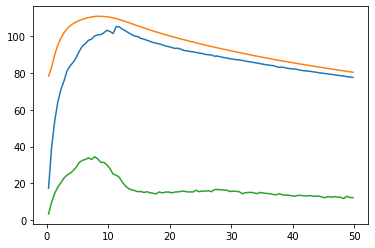

In [35]:
plt.plot(p['rbins'], test)
plt.plot(p['rbins'], test2)
plt.plot(p['rbins'], test3)

#plt.xscale('log')
#plt.yscale('log')

In [27]:
pynbody.analysis.profile.rotation_curve_spherical(p)

SimArray([40426.8887745 , 43537.29962749, 46751.38126516, 48760.72404179,
          50093.62847714, 50967.76880045, 51528.48544801, 51875.9268274 ,
          52020.29547844, 52073.29798647, 52044.74363882, 51961.54875708,
          51830.36426035, 51695.61856922, 51510.54435296, 51327.56433261,
          51131.82266121, 50932.62046076, 50722.55348075, 50511.17705029,
          50305.32299281, 50095.57629478, 49880.64134798, 49668.70378278,
          49458.146395  , 49247.54986374, 49036.45828888, 48829.33290734,
          48619.96944321, 48414.14679079, 48213.50751851, 48005.08053573,
          47803.05445039, 47608.11334935, 47414.25106353, 47216.40967386,
          47021.08255987, 46829.51300628, 46645.56057233, 46462.85595924,
          46279.78128033, 46095.78558849, 45913.11293808, 45734.19230354,
          45549.77501815, 45370.87655814, 45193.59131496, 45013.75823717,
          44839.32102279, 44662.31647356, 44486.37351017, 44311.86644808,
          44139.92057681, 43971.037645

In [12]:
pynbody.analysis.gravity

<module 'pynbody.analysis.gravity' from '/home/jw1624/miniconda3/lib/python3.9/site-packages/pynbody/analysis/gravity.py'>

In [ ]:
cen_pot

In [11]:
np.median(hCDM.g['v_disp'])

SimArray(56.72289333, 'km s**-1')

In [9]:
hCDM.derivable_keys()

['HII',
 'HeIII',
 'ne',
 'hetot',
 'hydrogen',
 'feh',
 'oxh',
 'ofe',
 'mgfe',
 'nefe',
 'sife',
 'c_s',
 'c_s_turb',
 'mjeans',
 'mjeans_turb',
 'ljeans',
 'ljeans_turb',
 'r',
 'rxy',
 'vr',
 'v2',
 'vt',
 'ke',
 'te',
 'j',
 'j2',
 'jz',
 'vrxy',
 'vcxy',
 'vphi',
 'vtheta',
 'v_mean',
 'v_disp',
 'v_curl',
 'vorticity',
 'v_div',
 'age',
 'u_mag',
 'u_lum_den',
 'b_mag',
 'b_lum_den',
 'v_mag',
 'v_lum_den',
 'r_mag',
 'r_lum_den',
 'i_mag',
 'i_lum_den',
 'j_mag',
 'j_lum_den',
 'h_mag',
 'h_lum_den',
 'k_mag',
 'k_lum_den',
 'U_mag',
 'U_lum_den',
 'B_mag',
 'B_lum_den',
 'V_mag',
 'V_lum_den',
 'R_mag',
 'R_lum_den',
 'I_mag',
 'I_lum_den',
 'J_mag',
 'J_lum_den',
 'H_mag',
 'H_lum_den',
 'K_mag',
 'K_lum_den',
 'theta',
 'alt',
 'az',
 'cs',
 'mu',
 'p',
 'u',
 'temp',
 'zeldovich_offset',
 'aform',
 'tform',
 'iord_argsort',
 'smooth',
 'rho']

In [8]:
def fourPanelProfiles(hID, d=1):
    # get data paths for specified halo 
    cdmPath, sidmPath = getfilepath(hID)
    
    cdmFile = cdmPath + '/r'+str(hID)+'.romulus25.3072g1HsbBH.004096'
    sidmFile = sidmPath + '/r'+str(hID)+'.romulus25cvdXsec.3072g1HsbBH.004096'
    
    orientation = 0
    
    fig, axs = plt.subplots(2,2, figsize=(12,12), facecolor='white')
    
    sCDM = pynbody.load(cdmFile)
    sSIDM = pynbody.load(sidmFile)
    
    sCDM.physical_units()
    sSIDM.physical_units()
    
    hCDM = sCDM.halos()[1]
    hSIDM = sSIDM.halos()[1]
    
    # center based on potential
    cen_pot = pynbody.analysis.halo.center(hCDM, mode='pot', retcen=True)
    sCDM['pos'] -= cen_pot
    cen_pot = pynbody.analysis.halo.center(hSIDM, mode='pot', retcen=True)
    sSIDM['pos'] -= cen_pot
    
    # profile range
    pmin = '0.01 kpc'
    #pmax = pynbody.analysis.halo.virial_radius(h1) / 4
    pmax = '50 kpc'
    
    # rotation curve
    pdCDM = pynbody.analysis.profile.Profile(hCDM.d, rmin=pmin, rmax=pmax, type='lin')
    pgCDM = pynbody.analysis.profile.Profile(hCDM.g, rmin=pmin, rmax=pmax, type='lin')
    psCDM = pynbody.analysis.profile.Profile(hCDM.s, rmin=pmin, rmax=pmax, type='lin')
    pCDM  = pynbody.analysis.profile.Profile(hCDM,   rmin=pmin, rmax=pmax, type='lin')
    
    pdSIDM = pynbody.analysis.profile.Profile(hSIDM.d, rmin=pmin, rmax=pmax, type='lin')
    pgSIDM = pynbody.analysis.profile.Profile(hSIDM.g, rmin=pmin, rmax=pmax, type='lin')
    psSIDM = pynbody.analysis.profile.Profile(hSIDM.s, rmin=pmin, rmax=pmax, type='lin')
    pSIDM  = pynbody.analysis.profile.Profile(hSIDM,   rmin=pmin, rmax=pmax, type='lin')
    
    pdCDM2 = pynbody.analysis.profile.v_circ(pdCDM)
    pdSIDM2 = pynbody.analysis.profile.v_circ(pdSIDM)
    
    cdmC = 'coral'
    sidmC = 'royalblue'
    lw = 3
    
    key = 'density'
    if d == 0:
        key = 'v_circ'
    axs[0,0].plot(pdCDM['rbins'], pdCDM[key], c=cdmC, linewidth=lw)
    axs[0,0].plot(pdSIDM['rbins'], pdSIDM[key], c=sidmC, linewidth=lw)
   # if d==0:
        #axs[0,0].plot(pdCDM['rbins'], pdCDM2, c='red', linestyle='--', linewidth=2)
        #axs[0,0].plot(pdSIDM['rbins'], pdSIDM2, c='blue', linestyle='--', linewidth=2)
    
    axs[0,1].plot(pgCDM['rbins'], pgCDM[key], c=cdmC, linewidth=lw)
    axs[0,1].plot(pgSIDM['rbins'], pgSIDM[key], c=sidmC, linewidth=lw)
    
    axs[1,0].plot(psCDM['rbins'], psCDM[key], c=cdmC, linewidth=lw)
    axs[1,0].plot(psSIDM['rbins'], psSIDM[key], c=sidmC, linewidth=lw)
    
    axs[1,1].plot(pCDM['rbins'], pCDM[key], c=cdmC, linewidth=lw)
    axs[1,1].plot(pSIDM['rbins'], pSIDM[key], c=sidmC, linewidth=lw)
    
    axs[0,0].set_xscale('log')
    axs[0,0].set_yscale('log')
    axs[0,1].set_xscale('log')
    axs[0,1].set_yscale('log')
    axs[1,0].set_xscale('log')
    axs[1,0].set_yscale('log')
    axs[1,1].set_xscale('log')
    axs[1,1].set_yscale('log')
    
    plt.suptitle('Density Profiles for Galaxy '+str(hID), fontsize=20)
    if d == 0: plt.suptitle('Rotation Profiles for Galaxy '+str(hID), fontsize=20)
        
    axs[0,0].set_title('Dark Matter', fontsize=16)
    axs[0,1].set_title('Gas', fontsize=16)
    axs[1,0].set_title('Stars', fontsize=16)
    axs[1,1].set_title('All', fontsize=16)
    
    axs[0,0].legend(['CDM', 'SIDM'])
    
    plt.tight_layout()

pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this 

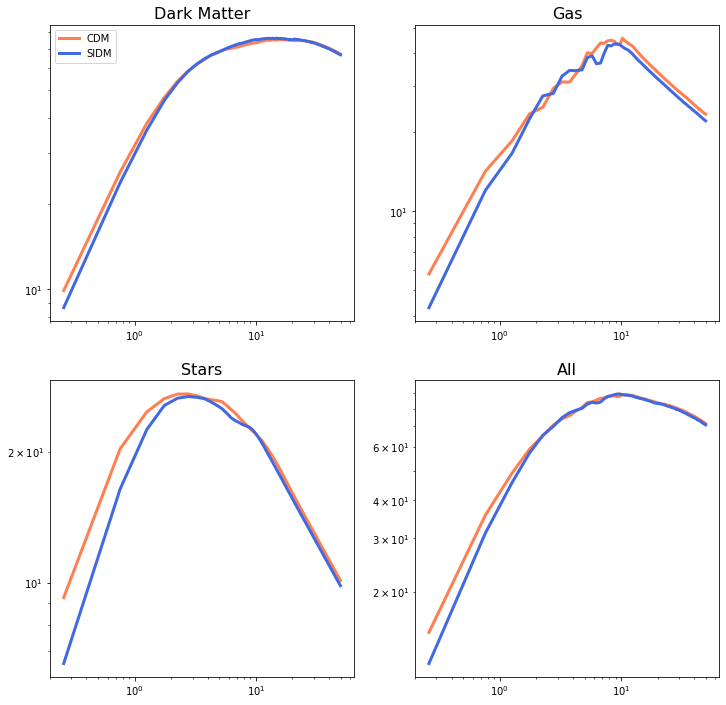

<Figure size 432x288 with 0 Axes>

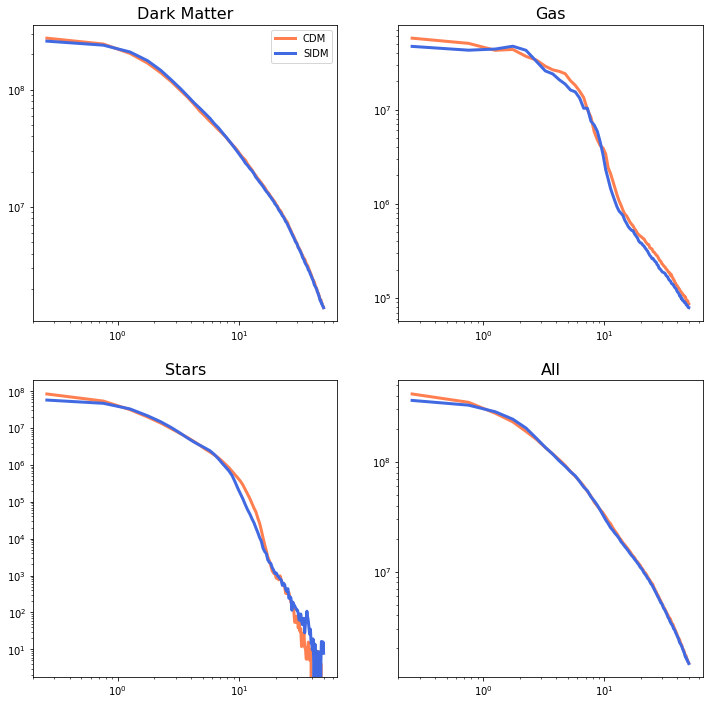

<Figure size 432x288 with 0 Axes>

In [9]:
hidx = 1

fourPanelProfiles(haloIDs[hidx], d=0)
plt.savefig('../figures/RotProfiles/r'+str(haloIDs[hidx])+'_rotation.png')

fourPanelProfiles(haloIDs[hidx], d=1)
plt.savefig('../figures/DenProfiles/r'+str(haloIDs[hidx])+'_density.png')

In [47]:
def eightPanelProfiles(hID, withSIDM=False):
    # get data paths for specified halo 
    cdmPath, sidmPath = getfilepath(hID)
    
    cdmFile = cdmPath + '/r'+str(hID)+'.romulus25.3072g1HsbBH.004096'
    
    fig, axs = plt.subplots(2,4, figsize=(16,8), facecolor='white')
    
    sCDM = pynbody.load(cdmFile)
    sCDM.physical_units()
    hCDM = sCDM.halos()[1]
    sCDM.physical_units()
    hCDM = sCDM.halos()[1]
    
    # center based on potential
    cen_pot = pynbody.analysis.halo.center(hCDM, mode='pot', retcen=True)
    sCDM['pos'] -= cen_pot
    
    pynbody.analysis.angmom.faceon(hCDM)
    
    # profile range
    pmin = '0.01 kpc'
    #pmax = pynbody.analysis.halo.virial_radius(h1) / 4
    pmax = '50 kpc'
    
    # rotation curve
    pdCDM = pynbody.analysis.profile.Profile(hCDM.d, rmin=pmin, rmax=pmax, type='lin')
    pgCDM = pynbody.analysis.profile.Profile(hCDM.g, rmin=pmin, rmax=pmax, type='lin')
    psCDM = pynbody.analysis.profile.Profile(hCDM.s, rmin=pmin, rmax=pmax, type='lin')
    pCDM  = pynbody.analysis.profile.Profile(hCDM,   rmin=pmin, rmax=pmax, type='lin')
    
    pdCDM2 = pynbody.analysis.profile.v_circ(pdCDM)
    
    cdmC = 'firebrick'
    sidmC = 'royalblue'
    lw = 3
    
    axs[0,0].plot(pdCDM['rbins'], pdCDM['density'], c=cdmC, linewidth=lw)    
    axs[0,1].plot(pgCDM['rbins'], pgCDM['density'], c=cdmC, linewidth=lw)
    axs[1,0].plot(psCDM['rbins'], psCDM['density'], c=cdmC, linewidth=lw)
    axs[1,1].plot(pCDM['rbins'], pCDM['density'], c=cdmC, linewidth=lw)
    
    axs[0,0].set_xscale('log')
    axs[0,0].set_yscale('log')
    axs[0,1].set_xscale('log')
    axs[0,1].set_yscale('log')
    axs[1,0].set_xscale('log')
    axs[1,0].set_yscale('log')
    axs[1,1].set_xscale('log')
    axs[1,1].set_yscale('log')
    
    plt.suptitle('Profiles for Galaxy '+str(hID), fontsize=20)
        
    axs[0,0].set_title('Density of Dark Matter', fontsize=16)
    axs[0,1].set_title('Density of Gas', fontsize=16)
    axs[1,0].set_title('Density of Stars', fontsize=16)
    axs[1,1].set_title('Density of All', fontsize=16)
    
    axs[0,2].plot(pdCDM['rbins'], pdCDM['v_circ'], c=cdmC, linewidth=lw)
    axs[0,3].plot(pgCDM['rbins'], pgCDM['v_circ'], c=cdmC, linewidth=lw)
    axs[1,2].plot(psCDM['rbins'], psCDM['v_circ'], c=cdmC, linewidth=lw)
    axs[1,3].plot(pCDM['rbins'], pCDM['v_circ'], c=cdmC, linewidth=lw)
    
    # v_circ from defn 
    G = 6.67e-7
    #axs[1,3].plot(pCDM['rbins'], np.sqrt((G*pCDM['mass_enc'])/pCDM['rbins']) )
    
    axs[0,2].set_xscale('log')
    axs[0,2].set_yscale('log')
    axs[0,3].set_xscale('log')
    axs[0,3].set_yscale('log')
    axs[1,2].set_xscale('log')
    axs[1,2].set_yscale('log')
    axs[1,3].set_xscale('log')
    axs[1,3].set_yscale('log')
    
    axs[0,2].set_title('Rotation of Dark Matter', fontsize=16)
    axs[0,3].set_title('Rotation of Gas', fontsize=16)
    axs[1,2].set_title('Rotation of Stars', fontsize=16)
    axs[1,3].set_title('Rotation of All', fontsize=16)
    
    if withSIDM:
        sidmFile = sidmPath + '/r'+str(hID)+'.romulus25cvdXsec.3072g1HsbBH.004096'
        
        sSIDM = pynbody.load(sidmFile)
        sSIDM.physical_units()
        hSIDM = sSIDM.halos()[1]
        
        cen_pot = pynbody.analysis.halo.center(hSIDM, mode='pot', retcen=True)
        sSIDM['pos'] -= cen_pot
        
        pynbody.analysis.angmom.faceon(hSIDM)
        
        pdSIDM = pynbody.analysis.profile.Profile(hSIDM.d, rmin=pmin, rmax=pmax, type='lin')
        pgSIDM = pynbody.analysis.profile.Profile(hSIDM.g, rmin=pmin, rmax=pmax, type='lin')
        psSIDM = pynbody.analysis.profile.Profile(hSIDM.s, rmin=pmin, rmax=pmax, type='lin')
        pSIDM  = pynbody.analysis.profile.Profile(hSIDM,   rmin=pmin, rmax=pmax, type='lin')
        
        axs[0,0].plot(pdSIDM['rbins'], pdSIDM['density'], c=sidmC, linewidth=lw)
        axs[0,1].plot(pgSIDM['rbins'], pgSIDM['density'], c=sidmC, linewidth=lw)
        axs[1,0].plot(psSIDM['rbins'], psSIDM['density'], c=sidmC, linewidth=lw)
        axs[1,1].plot(pSIDM['rbins'], pSIDM['density'], c=sidmC, linewidth=lw)
        
        pdSIDM2 = pynbody.analysis.profile.v_circ(pdSIDM)
        
        axs[0,2].plot(pdSIDM['rbins'], pdSIDM['v_circ'], c=sidmC, linewidth=lw)
        axs[0,3].plot(pgSIDM['rbins'], pgSIDM['v_circ'], c=sidmC, linewidth=lw)
        axs[1,2].plot(psSIDM['rbins'], psSIDM['v_circ'], c=sidmC, linewidth=lw)
        axs[1,3].plot(pSIDM['rbins'], pSIDM['v_circ'], c=sidmC, linewidth=lw)
    
        axs[0,0].legend(['CDM', 'SIDM'])
    
    fig.tight_layout()
    
    #if withSIDM:
        #plt.savefig('../figures/DenRotProfiles/r'+str(haloIDs[i])+'_8panel_2.png')
    #else:
        #plt.savefig('../figures/DenRotProfiles/r'+str(haloIDs[i])+'_8panel.png')

pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


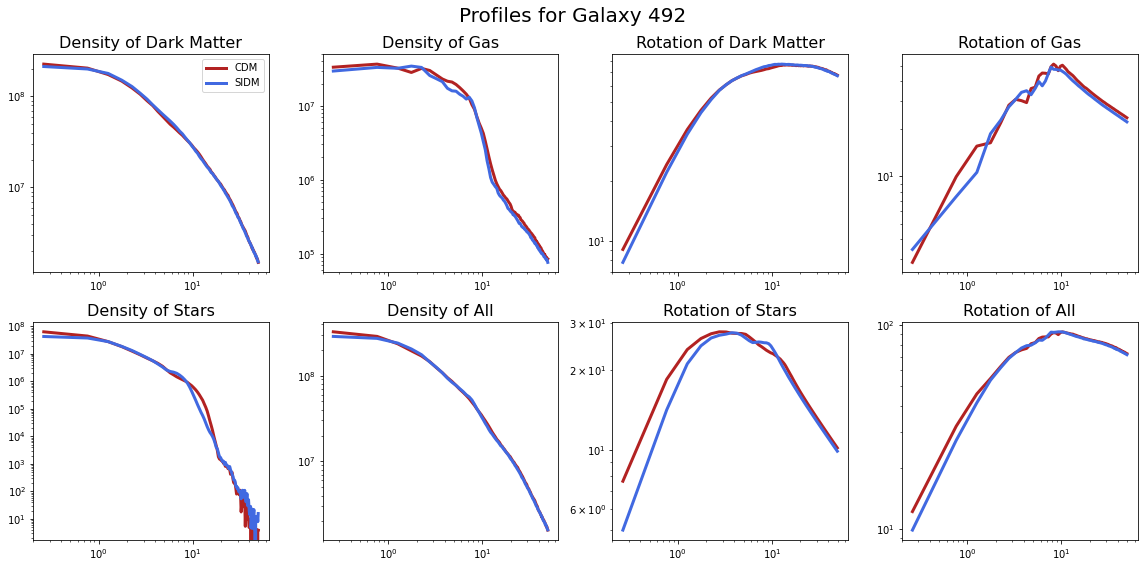

In [48]:
eightPanelProfiles(haloIDs[2], withSIDM=True)

# H1

In [4]:
fpath = getfilepath(431)

In [5]:
h1files = glob.glob(fpath[1]+'/*.fits')
h1files.sort()

In [6]:
# 36 x 54 x 54
data = fits.open(h1files[0])[0].data

In [7]:
h1files

['/data/REPOSITORY/e11Gals/romulus_dwarf_zooms/r431.romulus25cvdXsec.3072g1HsbBH/r431.romulus25cvdXsec.3072g1HsbBH.004096/r431.alfalfa_hi.x.fits',
 '/data/REPOSITORY/e11Gals/romulus_dwarf_zooms/r431.romulus25cvdXsec.3072g1HsbBH/r431.romulus25cvdXsec.3072g1HsbBH.004096/r431.alfalfa_hi.y.fits',
 '/data/REPOSITORY/e11Gals/romulus_dwarf_zooms/r431.romulus25cvdXsec.3072g1HsbBH/r431.romulus25cvdXsec.3072g1HsbBH.004096/r431.alfalfa_hi.z.fits']

In [8]:
fits.open(h1files[0])[0].header

SIMPLE  =                    T /                                                
BITPIX  =                   16 /                                                
NAXIS   =                    3 /                                                
NAXIS1  =                   54 /                                                
NAXIS2  =                   54 /                                                
NAXIS3  =                   36 /                                                
CTYPE1  = 'KPC-LIN'            /                                                
CUNIT1  = 'KPC'                /                                                
CRVAL1  =          -100.000005 /                                                
CDELT1  =             3.703704 /                                                
CRPIX1  =                  1.0 /                                                
CTYPE2  = 'KPC-LIN'            /                                                
CUNIT2  = 'KPC'             

In [9]:
# function to perform integration 
def integrateSpectral(data, initSpd, deltaSpd):
    start = 0
    end = len(data)

    tot = []
    for i in range(start,end):
        d = np.nan_to_num(np.array(data[i,:,:]), True, nan=0.0)
        d = d.flatten()
        tot.append(sum(d))

    vmax = max(tot)

    # make x-axis for line width figure 
    x = []
    for i in range(len(data)):
        x.append(initSpd+i*deltaSpd)
        
    return x, tot

In [10]:
# integrating over spectral axis
start = 0
end = len(data)

tot = []
for i in range(start,end):
    d = np.nan_to_num(np.array(data[i,:,:]), True, nan=0.0)
    d = d.flatten()
    tot.append(sum(d))
    
vmax = max(tot)

# make x-axis for line width figure 
st = -194.4
d = 11.2
x = []
for i in range(len(data)):
    x.append(st+i*d)

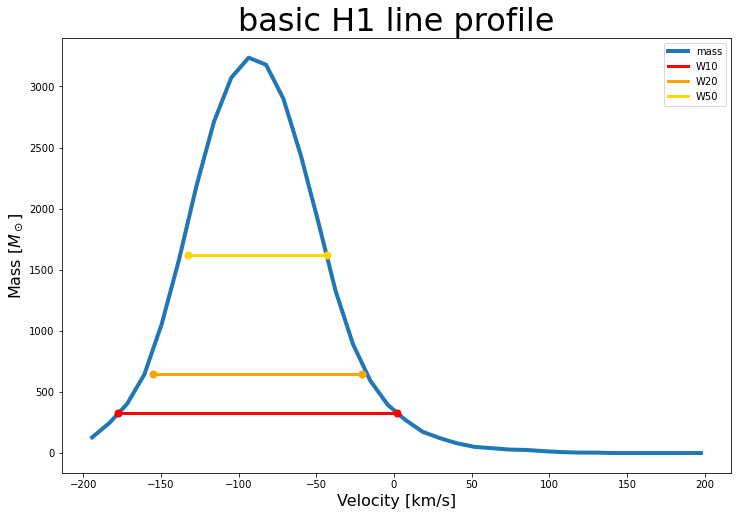

In [11]:
plt.figure(figsize=(12,8))

plt.plot(x,tot, linewidth=4)

plt.xlabel('Velocity [km/s]', fontsize=16)
plt.ylabel('Mass [$M_\odot$]', fontsize=16)
plt.title('basic H1 line profile', fontsize=32)

intervals = [10, 20, 50]
c = ['red', 'orange', 'gold']
for i,p in enumerate(intervals):
    val = (p/100)*vmax
    
    idxs_mass = np.argwhere(np.diff(np.sign(tot - np.full(len(tot),val)))).flatten()
    x1 = (x[idxs_mass[0]]+x[idxs_mass[0]+1])/2
    x2 = (x[idxs_mass[1]]+x[idxs_mass[1]+1])/2
    
    plt.plot([x1,x2],[val,val], linewidth=3, c=c[i], zorder=2)
    plt.scatter([x1,x2],[val,val], c=c[i], s=50, label='_nolegend_', zorder=2)
    
plt.legend(['mass', 'W10', 'W20', 'W50'])

1.4154592

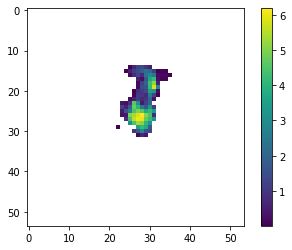

In [12]:
plt.imshow(data[18,:,:])
plt.colorbar()
data[18,30,30]

In [13]:
data.flatten()[18*30*30]

nan

In [17]:
f = fits.open('/data/REPOSITORY/e11Gals/romulus_dwarf_zooms/r492.romulus25.3072g1HsbBH/r492.romulus25.3072g1HsbBH.004096/r492.alfalfa_hi.x.fits')

In [18]:
bscale = f[0].header['BSCALE']
bzero = f[0].header['BZERO']
blank = f[0].header['BLANK']

d2 = np.nan_to_num(data, nan=blank) * bscale + bzero
d3 = np.power(np.full(d2.shape,10), d2)
d3[np.where(abs(d3 - 10**(blank*bscale + bzero))<10e-5)]=0.0
spectrum = np.sum(np.sum(d3, 1), 1)

In [22]:
f[0].header['BZERO']

4.615645

In [20]:
f[0].header

SIMPLE  =                    T /                                                
BITPIX  =                   16 /                                                
NAXIS   =                    3 /                                                
NAXIS1  =                   54 /                                                
NAXIS2  =                   54 /                                                
NAXIS3  =                   36 /                                                
CTYPE1  = 'KPC-LIN'            /                                                
CUNIT1  = 'KPC'                /                                                
CRVAL1  =          -100.000005 /                                                
CDELT1  =             3.703704 /                                                
CRPIX1  =                  1.0 /                                                
CTYPE2  = 'KPC-LIN'            /                                                
CUNIT2  = 'KPC'             

In [164]:
np.sum(np.sum(d3, 1), 0).shape

(54,)

In [165]:
d3.transpose().shape

(54, 54, 36)

In [166]:
bscale, bzero, blank

(0.000141, 4.615645, -32768)

In [183]:
d4=d3.transpose()
d4[26,26,:]

array([41324.04552031, 41329.76279683, 41335.25394182, 41343.605511  ,
       41350.59670841, 41355.9543999 , 41360.13206468, 41363.40183584,
       41366.49019041, 41369.16997899, 41371.21400223, 41372.21333924,
       41370.53264993, 41365.03681836, 41358.17940796, 41353.32087158,
       41349.41629344, 41347.19175681, 41342.97000621, 41339.02101686,
       41335.48086434, 41333.52937143, 41332.9847852 , 41329.626662  ,
       41329.39977163, 41329.85355362, 41325.31595785, 41322.50289866,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ])

In [168]:
spectrum

array([1.15730728e+06, 4.50185258e+06, 1.03231123e+07, 2.22124038e+07,
       4.42153885e+07, 6.29182440e+07, 8.09617317e+07, 8.98419947e+07,
       9.21993060e+07, 9.29031063e+07, 9.29023320e+07, 9.11652086e+07,
       8.58350467e+07, 7.53036600e+07, 5.47018432e+07, 3.29461849e+07,
       1.88274916e+07, 9.78650731e+06, 5.41015166e+06, 3.30401332e+06,
       1.98263826e+06, 1.32172970e+06, 6.61008212e+05, 4.54509266e+05,
       3.30549548e+05, 3.30501667e+05, 2.06557463e+05, 1.23915860e+05,
       4.13167866e+04, 4.13168320e+04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [169]:
len(spectrum)

36

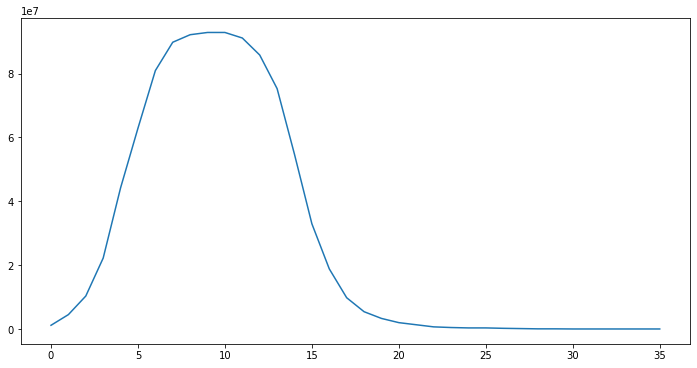

In [170]:
plt.figure(figsize=(12,6))
plt.plot(spectrum)

In [110]:
spectrum

array([1.17904300e+06, 4.58640317e+06, 1.05169936e+07, 2.26295813e+07,
       4.50458104e+07, 6.40999296e+07, 8.24822971e+07, 9.15293430e+07,
       9.39309276e+07, 9.46479462e+07, 9.46471574e+07, 9.28774086e+07,
       8.74471394e+07, 7.67179596e+07, 5.57292142e+07, 3.35649566e+07,
       1.91810961e+07, 9.97031051e+06, 5.51176127e+06, 3.36606695e+06,
       2.01987476e+06, 1.34655348e+06, 6.73422798e+05, 4.63045535e+05,
       3.36757694e+05, 3.36708913e+05, 2.10436878e+05, 1.26243159e+05,
       4.20927691e+04, 4.20928153e+04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

## Four panel, comparing different angles of CDM to SIDM

In [26]:
# function to make figure 
def fourPanelH1_likeAngles(hID):
    # some plotting params 
    intervals = [10, 20, 50]
    cdmC = 'coral'
    sidmC = 'royalblue'
    cdmWs = ['orangered', 'orangered', 'orangered']
    sidmWs = ['cornflowerblue', 'cornflowerblue', 'cornflowerblue']
    lw=3
    lwW = 1.5
    ms = 35
    
    # get data paths for specified halo 
    cdmPath, sidmPath = getfilepath(hID)
    
    cdmFiles = glob.glob(cdmPath+'/*.fits')
    cdmFiles.sort()
    if len(cdmFiles) == 4: cdmFiles = cdmFiles[1:]
    sidmFiles = glob.glob(sidmPath+'/*.fits')
    sidmFiles.sort()
    
    fig, axs = plt.subplots(3,1, figsize=(10, 14))
    
    # iterate over orientations 
    for i in range(len(sidmFiles)):
        # load data for each file
        cdmf = fits.open(cdmFiles[i])[0]
        cdmInitSpd = cdmf.header['CRVAL3']
        cdmDeltaSpd = cdmf.header['CDELT3']
        cdmDat = cdmf.data
        
        sidmf = fits.open(sidmFiles[i])[0]
        sidmInitSpd = sidmf.header['CRVAL3']
        sidmDeltaSpd = sidmf.header['CDELT3']
        sidmDat = sidmf.data
        
        # integrate
        cdmX, cdmY = integrateSpectral(cdmDat, cdmInitSpd, cdmDeltaSpd)
        sidmX, sidmY = integrateSpectral(sidmDat, sidmInitSpd, sidmDeltaSpd)
        
        # plot curves 
        lcdm, = axs[i].plot(cdmX, cdmY, linewidth=lw, c=cdmC)
        lsidm, = axs[i].plot(sidmX, sidmY, linewidth=lw, c=sidmC)
        
        # do line widths of cmd 
        vmax = max(cdmY)
        for j,p in enumerate(intervals):
            val = (p/100)*vmax

            idxs_mass = np.argwhere(np.diff(np.sign(cdmY - np.full(len(cdmY),val)))).flatten()
            if len(idxs_mass) < 2: continue 
            x1 = (cdmX[idxs_mass[0]]+cdmX[idxs_mass[0]+1])/2
            x2 = (cdmX[idxs_mass[1]]+cdmX[idxs_mass[1]+1])/2
            
            axs[i].plot([x1,x2],[val,val], linewidth=lwW, color=cdmWs[j], zorder=2)
            axs[i].scatter([x1,x2],[val,val], color=cdmWs[j], s=25, label='_nolegend_', zorder=2)
        
        # do line widths of sidm 
        vmax = max(sidmY)
        for j,p in enumerate(intervals):
            val = (p/100)*vmax

            idxs_mass = np.argwhere(np.diff(np.sign(sidmY - np.full(len(sidmY),val)))).flatten()
            if len(idxs_mass) < 2: continue 
            x1 = (sidmX[idxs_mass[0]]+sidmX[idxs_mass[0]+1])/2
            x2 = (sidmX[idxs_mass[1]]+sidmX[idxs_mass[1]+1])/2
            
            axs[i].plot([x1,x2],[val,val], linewidth=lwW, color=sidmWs[j], zorder=2)
            axs[i].scatter([x1,x2],[val,val], color=sidmWs[j], s=25, label='_nolegend_', zorder=2, marker='^')
        
        # prettify 
        titles = [r'$\hat{x}$ Orientation', r'$\hat{y}$ Orientation', r'$\hat{z}$ Orientation']
        axs[i].set_title(titles[i], fontsize=20)
        
        axs[i].set_xlabel('Velocity [km/s]', fontsize=14)
        axs[i].set_ylabel(r'$M_\odot$', fontsize=18)
        
        axs[i].legend([lcdm, lsidm],['CDM','SIDM'])

    plt.tight_layout()

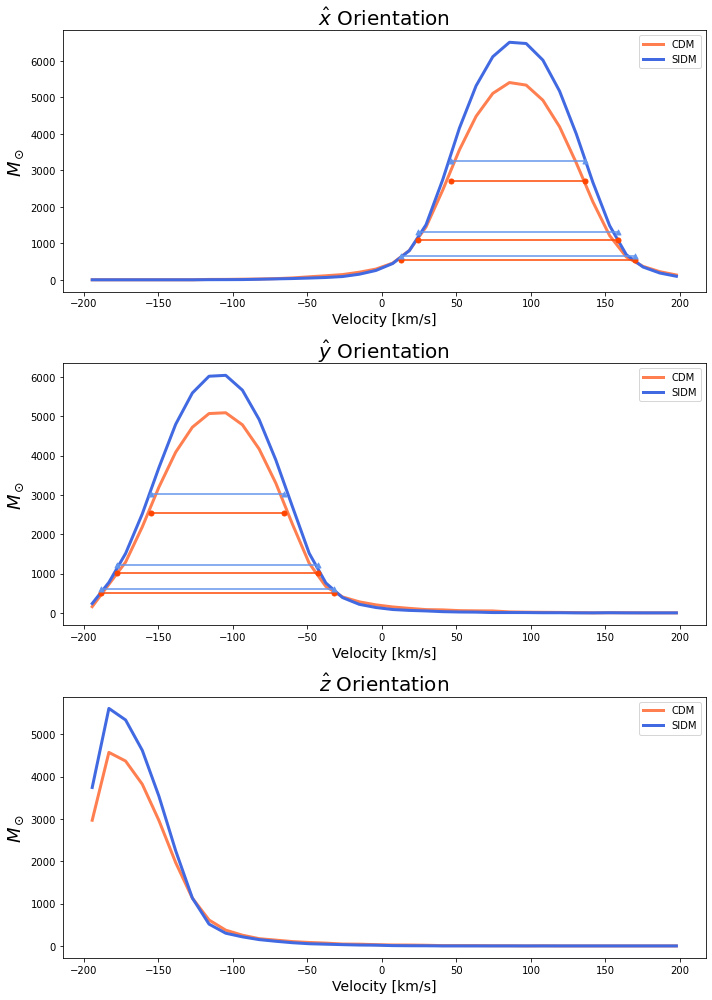

In [28]:
hidx = 1
fourPanelH1_likeAngles(haloIDs[hidx])
plt.savefig('figures/r'+str(haloIDs[hidx])+'_H1velocity.png')

In [30]:
getfilepath(468)

['/data/REPOSITORY/e11Gals/romulus_dwarf_zooms/r468.romulus25.3072g1HsbBH/r468.romulus25.3072g1HsbBH.004096',
 '/data/REPOSITORY/e11Gals/romulus_dwarf_zooms/r468.romulus25cvdXsec.3072g1HsbBH/r468.romulus25cvdXsec.3072g1HsbBH.004096']

## V_max and HI width

Goal here is to check the correlation between Vmax (halo) and the Hi width, in both CDM and SIDM

In [5]:
cdmgals,sidmgals,_ = util.getGalaxies()

In [6]:
# first cdm
cdmVmaxs = []
for g in cdmgals:
    f = util.getfilepath(g)[0]

    cdmFile = f + '/r'+str(g)+'.romulus25.3072g1HsbBH.004096'
    
    sCDM = pynbody.load(cdmFile)
    sCDM.physical_units()
    hCDM = sCDM.halos()[1]
    
    # center based on potential
    cen_pot = pynbody.analysis.halo.center(hCDM, mode='pot', retcen=True)
    sCDM['pos'] -= cen_pot
    
    # profile range
    pmin = '0.01 kpc'
    #pmax = pynbody.analysis.halo.virial_radius(h1) / 4
    pmax = '50 kpc'
    
    # rotation curve
    pCDM = pynbody.analysis.profile.Profile(hCDM.d, rmin=pmin, rmax=pmax, type='lin')
    
    # thrice for later plot; we have 3 orientations per gal 
    for _ in [0,0,0]:
        cdmVmaxs.append(float(pCDM['v_circ'].max()))
    
# now sidm
sidmVmaxs = []
for g in sidmgals:
    f = util.getfilepath(g)[1]
    
    sidmFile = f+'/r'+str(g)+'.romulus25cvdXsec.3072g1HsbBH.004096'
    
    sSIDM = pynbody.load(sidmFile)
    sSIDM.physical_units()
    hSIDM = sSIDM.halos()[1]
    
    # center based on potential 
    cen_pot = pynbody.analysis.halo.center(hSIDM, mode='pot', retcen=True)
    sSIDM['pos'] -= cen_pot
    
    # profile range 
    pmin = '0.01 kpc'
    pmax = '50.0 kpc'
    
    # rot 
    pSIDM = pynbody.analysis.profile.Profile(hSIDM.d, rmin=pmin, rmax=pmax, type='lin')
    
    # thrice for later; we have 3 orientations per gal
    for _ in [0,0,0]:
        sidmVmaxs.append(float(pSIDM['v_circ'].max()))
        
cdmVmaxs = np.array(cdmVmaxs)
sidmVmaxs = np.array(sidmVmaxs)

pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


In [10]:
# now get h1 vel width data
dfh1 = pd.read_csv('~/H1-merian/csvs/HI_widths.txt', sep=',')

# clean out -1's 
w50cdm = dfh1['w50_cdm'].to_numpy()
w20cdm = dfh1['w20_cdm'].to_numpy()
w10cdm = dfh1['w10_cdm'].to_numpy()

In [11]:
w50cdm

array([145.599993  , 134.3999978 , 145.5999935 ,  67.19999835,
        78.3999985 ,  78.4000035 , 156.7999972 ,  78.399999  ,
        55.999995  ,  89.59999835,  67.199998  ,  89.5999985 ,
        89.599998  ,  78.3999985 ,  78.400003  ,  -1.        ,
        67.199998  ,  89.599992  , 145.60000105, 111.99999845,
       145.600002  ])

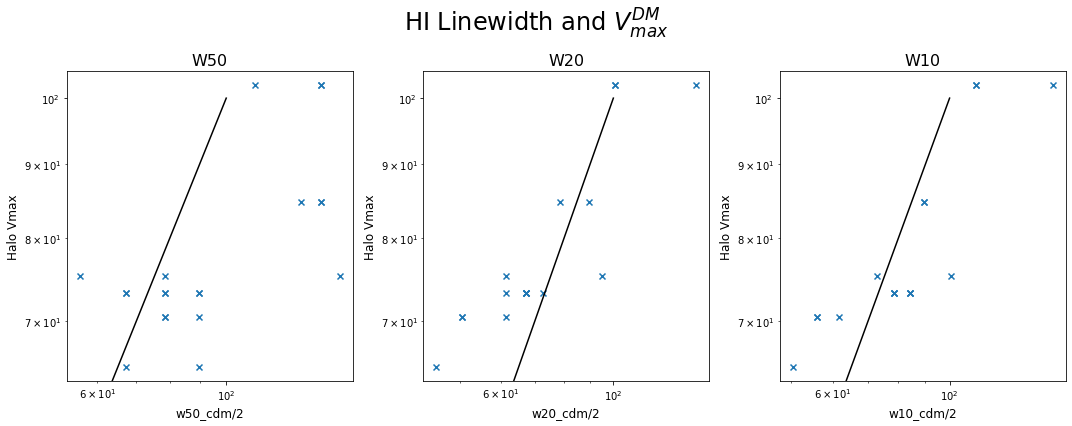

In [12]:
fig, axs = plt.subplots(1,3, figsize=(15,6))

axs[0].scatter(w50cdm[np.where(w50cdm > -1.0)[0]], cdmVmaxs[np.where(w50cdm > -1.0)[0]], marker='x')
axs[1].scatter(dfh1['w20_cdm']/2, cdmVmaxs, marker='x')
axs[2].scatter(dfh1['w10_cdm']/2, cdmVmaxs, marker='x')

for ax in axs:
    ax.plot([0,100], [0,100], 'k')
    #ax.set_xlim(40)
    #ax.set_ylim([20,60])
    ax.set_ylabel('Halo Vmax', fontsize=12)
    ax.set_xscale('log')
    ax.set_yscale('log')
    
axs[0].set_xlabel('w50_cdm/2', fontsize=12)
axs[1].set_xlabel('w20_cdm/2', fontsize=12)
axs[2].set_xlabel('w10_cdm/2', fontsize=12)    
    
axs[0].set_title('W50', fontsize=16)
axs[1].set_title('W20', fontsize=16)
axs[2].set_title('W10', fontsize=16)

plt.suptitle(r'HI Linewidth and $V_{max}^{DM}$', fontsize=24)

fig.tight_layout()

In [3]:
g = cdmgals[0]
f = util.getfilepath(g)[0]

cdmFile = f + '/r'+str(g)+'.romulus25.3072g1HsbBH.004096'
    
sCDM = pynbody.load(cdmFile)
sCDM.physical_units()
hCDM = sCDM.halos()[1]

In [13]:
me = pynbody.analysis.profile.Profile(hCDM)

In [15]:
me['mass_enc']

SimArray([2.10074318e+06, 7.51479643e+06, 1.64208671e+07, 2.96898038e+07,
          4.78951614e+07, 7.08111518e+07, 1.00994909e+08, 1.38834868e+08,
          1.84236690e+08, 2.37357972e+08, 3.00924828e+08, 3.72606096e+08,
          4.52810265e+08, 5.45927243e+08, 6.52396019e+08, 7.68817123e+08,
          8.96797259e+08, 1.04231374e+09, 1.21058633e+09, 1.40029956e+09,
          1.61162992e+09, 1.84708744e+09, 2.11348785e+09, 2.41304012e+09,
          2.74184265e+09, 3.09968059e+09, 3.48833490e+09, 3.91991588e+09,
          4.38271444e+09, 4.88580613e+09, 5.42787340e+09, 6.01453585e+09,
          6.64797067e+09, 7.32544695e+09, 8.06686498e+09, 8.87219910e+09,
          9.76130448e+09, 1.07619939e+10, 1.18801715e+10, 1.31342846e+10,
          1.45642920e+10, 1.61766004e+10, 1.80144296e+10, 2.01168216e+10,
          2.25487427e+10, 2.54534125e+10, 2.92025356e+10, 3.41893221e+10,
          4.08217610e+10, 4.96542123e+10, 5.73118847e+10, 6.31871863e+10,
          6.77782158e+10, 7.15665921e+

## Kurtosis and Steepness vs V/sigma

In [36]:
# get the data
fwid = '/home/jw1624/H1-merian/csvs/HI_widths.txt'
fDisp = '/home/jw1624/H1-merian/csvs/vDisp_cdm.txt'
fVmax = '/home/jw1624/H1-merian/csvs/vMaxGasCDM.txt'

In [37]:
widdf = pd.read_csv(fwid)
sigma = pd.read_csv(fDisp)['v_disp'].to_numpy()
Vmax = pd.read_csv(fVmax)['VmaxGas'].to_numpy()

vOverS = Vmax/sigma

In [38]:
widdf

,galaxy,w50_cdm,w20_cdm,w10_cdm,w50_sidm,w20_sidm,w10_sidm,dW_cdm,dW_sidm,K_cdm,K_sidm
0,431_x,145.599993,179.199993,179.199993,123.199994,145.599993,156.799993,0.230769,0.181818,-0.969173,-0.574194
1,431_y,134.399998,156.799992,179.199992,100.799998,134.399993,156.799993,0.166667,0.333333,-0.866919,-0.097769
2,431_z,145.599994,-1.000000,-1.000000,67.199994,123.199994,-1.000000,-1.000000,0.833333,-1.057293,-0.550569
3,468_x,67.199998,134.399998,168.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.191547,-1.000000
4,468_y,78.399999,134.399997,156.799997,-1.000000,-1.000000,-1.000000,0.714286,-1.000000,1.136447,-1.000000
5,468_z,78.400003,123.199993,156.799993,-1.000000,-1.000000,-1.000000,0.571428,-1.000000,1.066581,-1.000000
6,492_x,156.799997,190.399997,201.599997,134.399998,179.199997,179.199997,0.214286,0.333333,-0.881726,-0.764089
7,492_y,78.399999,123.199994,145.599993,78.399994,123.199994,145.599994,0.571429,0.571429,-0.188676,-0.276330
8,492_z,55.999995,-1.000000,-1.000000,55.999995,-1.000000,-1.000000,-1.000000,-1.000000,1.034297,0.438793
9,502_x,89.599998,145.600000,168.000002,-1.000000,-1.000000,-1.000000,0.625000,-1.000000,0.645962,-1.000000


In [39]:
vOverS2 = []
for i,_ in enumerate(widdf['K_cdm']):
    vOverS2.append(vOverS[int(i/3)])

Text(0, 0.5, 'HI Kurtosis')

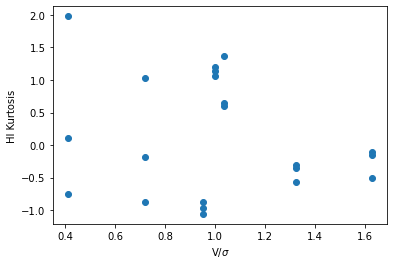

In [42]:
plt.scatter(vOverS2, widdf['K_cdm'])
plt.xlabel(r'V/$\sigma$')
plt.ylabel('HI Kurtosis')

#plt.ylim([0.0,1.0])

## Nihao Figure

Things this figure has:
* DMO (adiabatic) rotation curve
* Vcirc hydro
* HI radius
* W50 and W20

pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
/home/jw1624/miniconda3/lib/python3.9/site-packages/matplotlib/text.py:833: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/home/jw1624/miniconda3/lib/python3.9/site-packages/matplotlib/text.py:693: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


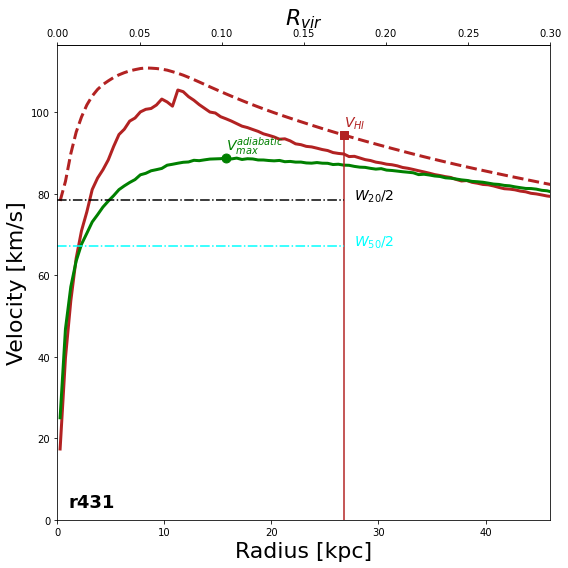

In [12]:
hID = haloIDs[0]

fig,ax = plt.subplots(1,1, layout='constrained', figsize=(8,8))

# some plotting params 
cdmC = 'firebrick'
sidmC = 'royalblue'
adiabatC = 'g'
lw = 3

# --- let's start with the rotation curves --- 
# profile range
pmin = '0.01 kpc'
pmax = '50 kpc'

cdmPath, sidmPath, adiabaticPath = util.getfilepath(hID)

#
# cdm curve 
cdmFile = cdmPath + '/r'+str(hID)+'.romulus25.3072g1HsbBH.004096'

sCDM = pynbody.load(cdmFile)
sCDM.physical_units()
hCDM = sCDM.halos()[1]

# center based on potential
cen_pot_cdm = pynbody.analysis.halo.center(hCDM, mode='pot', retcen=True)
sCDM['pos'] -= cen_pot_cdm

pynbody.analysis.angmom.faceon(hCDM)

pCDM  = pynbody.analysis.profile.Profile(hCDM,   rmin=pmin, rmax=pmax, type='lin')
pgCDM = pynbody.analysis.profile.Profile(hCDM.g, rmin=pmin, rmax=pmax, type='lin')
pCDM_grav = pynbody.analysis.profile.rotation_curve_spherical(pCDM).in_units(pCDM.sim['vel'].units)
ax.plot(pCDM['rbins'], pCDM['v_circ'], c=cdmC, linewidth=lw)
ax.plot(pCDM['rbins'], pCDM_grav, c=cdmC, linewidth=lw, linestyle='dashed')

#
# adiabatic curve
adiaFile = adiabaticPath +'/r'+str(hID)+'.romulus25.3072g1HsbBH.004096'

sA = pynbody.load(adiaFile)
sA.physical_units()
hA = sA.halos()[1]

# center 
cen_pot_a = pynbody.analysis.halo.center(hA, mode='pot', retcen=True)
sA['pos'] -= cen_pot_a

pynbody.analysis.angmom.faceon(hA)

pA  = pynbody.analysis.profile.Profile(hA,   rmin=pmin, rmax=pmax, type='lin')
ax.plot(pA['rbins'], pA['v_circ'], c=adiabatC, linewidth=lw)

# 
# get virial radius 
Rvir = pynbody.analysis.halo.virial_radius(sCDM)

#
# get HI radius (radius that encompasses 80% of the HI [NIAHO XVII])
rHI=0
for i in range(len(pgCDM['mass_enc'])):
    if pgCDM['mass_enc'][i] >= 0.9*pgCDM['mass_enc'][-1]:
        rHI=pgCDM['rbins'][i]
        break
    
# plot verticle line at rHI
Vhi = pCDM_grav[i] #Vhi is I velocity at the HI radius
ax.plot([rHI,rHI],[0,Vhi], c=cdmC)
ax.scatter([rHI], [Vhi], c=cdmC, marker='s', s=60)
ax.text(rHI, Vhi+2, r'$V_{HI}$', c=cdmC, fontsize=14)

#
# read W50 adnd W20 from csv
df = pd.read_csv('/home/jw1624/H1-merian/csvs/HI_widths.txt')
w50 = df['w50_cdm'][df['galaxy']==str(hID)+'_y']
w20 = df['w20_cdm'][df['galaxy']==str(hID)+'_y']

# horizontal line for widths 
ax.plot([0,rHI], [w50/2,w50/2], c='cyan', linestyle='dashdot')
ax.text(rHI+1, w50/2, r'$W_{50}/2$', c='cyan', fontsize=14)

ax.plot([0,rHI], [w20/2,w20/2], c='k', linestyle='dashdot')
ax.text(rHI+1, w20/2, r'$W_{20}/2$', c='k', fontsize=14)


# mark VmaxDMO (adiabatic)
vmax = max(pA['v_circ'])
rvmax = np.where(pA['v_circ'] == max(pA['v_circ']))[0][0]
ax.scatter([pA['rbins'][rvmax]],[vmax], c='g', marker='o', s=80)
ax.text(pA['rbins'][rvmax],vmax+2, r'$V_{max}^{adiabatic}$', c='g', fontsize=14)

#
# prettify 
ax.set_xlabel('Radius [kpc]', fontsize=22)
ax.set_ylabel('Velocity [km/s]', fontsize=22)

def botToTop(x): return x/Rvir
def topToBot(x): return x*Rvir
secax = ax.secondary_xaxis('top', functions=(botToTop,topToBot))
secax.set_xlabel(r'$R_{vir}$', fontsize=22)

ax.set_xlim([0,0.3*Rvir]) # should be 0.3*virial radius
ax.set_ylim(bottom=0)

ax.text(1,3, 'r'+str(hID), c='k', fontsize=18, weight='bold')

plt.tight_layout()

In [69]:
np.where(pA['v_circ'] == max(pA['v_circ']))[0][0]

31

In [70]:
max(pA['v_circ'])

88.782427083073

In [17]:
 math.floor(1.2)

1

pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


0


/home/jw1624/miniconda3/lib/python3.9/site-packages/matplotlib/text.py:693: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


1


/home/jw1624/miniconda3/lib/python3.9/site-packages/matplotlib/text.py:693: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


2


/home/jw1624/miniconda3/lib/python3.9/site-packages/matplotlib/text.py:693: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


3


/home/jw1624/miniconda3/lib/python3.9/site-packages/matplotlib/text.py:693: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


4


/home/jw1624/miniconda3/lib/python3.9/site-packages/matplotlib/text.py:693: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


5


/home/jw1624/miniconda3/lib/python3.9/site-packages/matplotlib/text.py:693: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


6


/home/jw1624/miniconda3/lib/python3.9/site-packages/matplotlib/text.py:693: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


7


/home/jw1624/miniconda3/lib/python3.9/site-packages/matplotlib/text.py:693: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/home/jw1624/miniconda3/lib/python3.9/site-packages/matplotlib/text.py:833: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


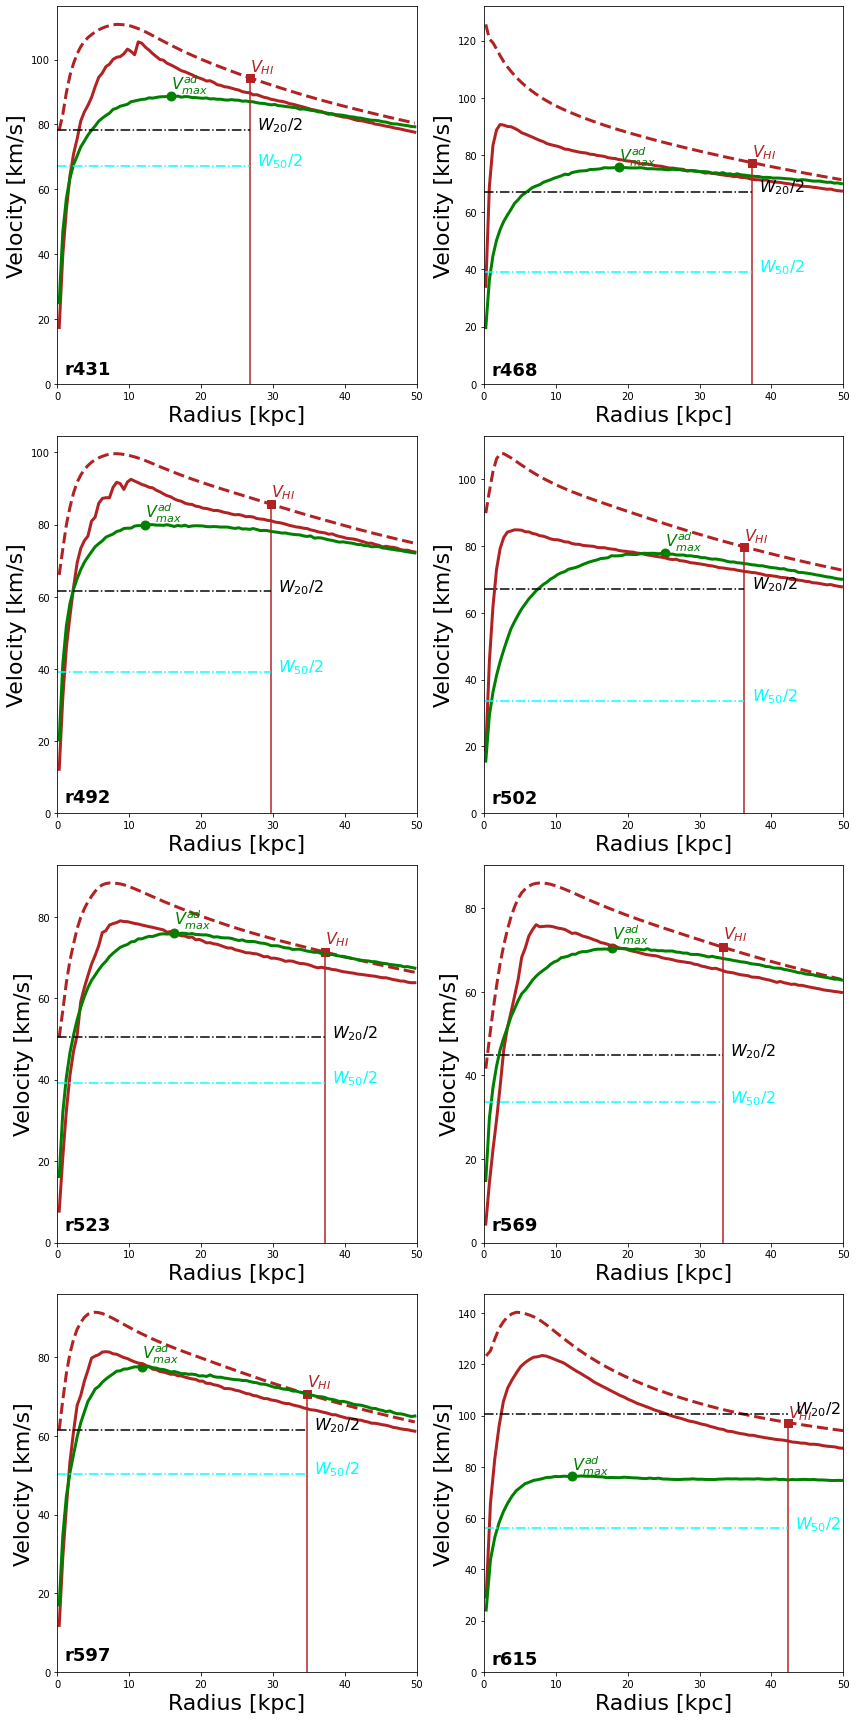

In [5]:
# let's do it with six panels 
fig, axs = plt.subplots(4,2, figsize=(12,24), facecolor='w')

# write vmax ada to csv
fcsv = open('/home/jw1624/H1-merian/csvs/vMaxAda.txt', 'w')
fcsv.write('galaxy,vMaxAda\n')

# some plotting params 
cdmC = 'firebrick'
sidmC = 'royalblue'
adiabatC = 'g'
lw = 3

# --- let's start with the rotation curves --- 

# iterate over each galaxy
for j,hID in enumerate(haloIDs):
    pltrow = int(j/2)
    pltcol = j%2

    cdmPath, sidmPath, adiabaticPath = util.getfilepath(hID)

    #
    # cdm curve 
    
    # profile range
    pmin = '0.01 kpc'
    pmax = '50 kpc'
    if hID == 615: pmax = '60 kpc'
    
    cdmFile = cdmPath + '/r'+str(hID)+'.romulus25.3072g1HsbBH.004096'
    #if str(hID) == '597': cdmFile = cdmPath
    
    sCDM = pynbody.load(cdmFile)
    sCDM.physical_units()
    hCDM = sCDM.halos()[1]

    # center based on potential
    cen_pot_cdm = pynbody.analysis.halo.center(hCDM, mode='pot', retcen=True)
    sCDM['pos'] -= cen_pot_cdm

    pynbody.analysis.angmom.faceon(hCDM)

    pCDM  = pynbody.analysis.profile.Profile(hCDM,   rmin=pmin, rmax=pmax, type='lin')
    pgCDM = pynbody.analysis.profile.Profile(hCDM.g, rmin=pmin, rmax=pmax, type='lin')
    pCDM_grav = pynbody.analysis.profile.rotation_curve_spherical(pCDM).in_units(pCDM.sim['vel'].units)
    axs[pltrow,pltcol].plot(pCDM['rbins'], pCDM['v_circ'], c=cdmC, linewidth=lw)
    axs[pltrow,pltcol].plot(pCDM['rbins'], pCDM_grav, c=cdmC, linewidth=lw, linestyle='dashed')
    
    #
    # adiabatic curve
    adiaFile = adiabaticPath +'/r'+str(hID)+'.romulus25.3072g1HsbBH.004096'
    
    sA = pynbody.load(adiaFile)
    sA.physical_units()
    hA = sA.halos()[1]

    # center 
    cen_pot_a = pynbody.analysis.halo.center(hA, mode='pot', retcen=True)
    sA['pos'] -= cen_pot_a

    pynbody.analysis.angmom.faceon(hA)

    pA  = pynbody.analysis.profile.Profile(hA,   rmin=pmin, rmax=pmax, type='lin')
    axs[pltrow,pltcol].plot(pA['rbins'], pA['v_circ'], c=adiabatC, linewidth=lw)
    
    # 
    # get virial radius 
    Rvir = pynbody.analysis.halo.virial_radius(sCDM)

    #
    # get HI radius (radius that encompasses 80% of the HI [NIAHO XVII])
    rHI=0
    for i in range(len(pgCDM['mass_enc'])):
        if pgCDM['mass_enc'][i] >= 0.9*pgCDM['mass_enc'][-1]:
            rHI=pgCDM['rbins'][i]
            break
    
    # plot verticle line at rHI
    Vhi = pCDM_grav[i] #Vhi is I velocity at the HI radius
    axs[pltrow,pltcol].plot([rHI,rHI],[0,Vhi], c=cdmC)
    axs[pltrow,pltcol].scatter([rHI], [Vhi], c=cdmC, marker='s', s=60)
    axs[pltrow,pltcol].text(rHI, Vhi+2, r'$V_{HI}$', c=cdmC, fontsize=16)

    #
    # read W50 adnd W20 from csv
    df = pd.read_csv('/home/jw1624/H1-merian/csvs/HI_widths.txt')
    w50 = df['w50_cdm'][df['galaxy']==str(hID)+'_y']
    w20 = df['w20_cdm'][df['galaxy']==str(hID)+'_y']
    
    # horizontal line for widths 
    axs[pltrow,pltcol].plot([0,rHI], [w50/2,w50/2], c='cyan', linestyle='dashdot')
    axs[pltrow,pltcol].text(rHI+1, w50/2, r'$W_{50}/2$', c='cyan', fontsize=16)

    axs[pltrow,pltcol].plot([0,rHI], [w20/2,w20/2], c='k', linestyle='dashdot')
    axs[pltrow,pltcol].text(rHI+1, w20/2, r'$W_{20}/2$', c='k', fontsize=16)

    
    # mark VmaxDMO (adiabatic)
    vmax = max(pA['v_circ'])
    rvmax = np.where(pA['v_circ'] == max(pA['v_circ']))[0][0]
    axs[pltrow,pltcol].scatter([pA['rbins'][rvmax]],[vmax], c='g', marker='o', s=80)
    axs[pltrow,pltcol].text(pA['rbins'][rvmax],vmax+2, r'$V_{max}^{ad}$', c='g', fontsize=16)

    fcsv.write(str(hID)+','+str(vmax)+'\n')
    
    #
    # prettify 
    axs[pltrow,pltcol].set_xlabel('Radius [kpc]', fontsize=22)
    axs[pltrow,pltcol].set_ylabel('Velocity [km/s]', fontsize=22)
    def botToTop(x): return x/Rvir
    def topToBot(x): return x*Rvir
    #secax = axs[pltrow,pltcol].secondary_xaxis('top', functions=(botToTop,topToBot))
    #secax.set_xlabel(r'$r/R_{vir}$', fontsize=22)

    axs[pltrow,pltcol].set_xlim([0,50]) # should be 0.3*virial radius
    axs[pltrow,pltcol].set_ylim(bottom=0)

    axs[pltrow,pltcol].text(1,3, 'r'+str(hID), c='k', fontsize=18, weight='bold')

    print(j)

    fig.canvas.draw()

fcsv.close()
plt.tight_layout()

plt.savefig('VelocityDefns.png')